# Assignment 6

#### <b>a) Print “Welcome to PDPU from process (processno_totalprocesses)".</b>

In [1]:
import mpi4py
from mpi4py import MPI

In [2]:
comm = MPI.COMM_WORLD # get the communicator object
rank = comm.Get_rank() # get the rank of the current process
name = MPI.Get_processor_name() # get the name of the current processor
size = comm.Get_size() # get the number of processes
universe_size = comm.Get_attr(MPI.UNIVERSE_SIZE) # get the expected number of processes

In [3]:
print("Welcome to PDPU!")
print("Process name:", name)
print("Process id:", rank)
print("Number of cores:", size)

Welcome to PDPU!
Process name: Kavan
Process id: 0
Number of cores: 1


In [4]:
!mpiexec -n 10 python hpc_mpi.py

Welcome to PDPU Process name: Kavan Process id: 4 Number of cores: 10
Welcome to PDPU Process name: Kavan Process id: 8 Number of cores: 10
Welcome to PDPU Process name: Kavan Process id: 2 Number of cores: 10
Welcome to PDPU Process name: Kavan Process id: 5 Number of cores: 10
Welcome to PDPU Process name: Kavan Process id: 7 Number of cores: 10
Welcome to PDPU Process name: Kavan Process id: 0 Number of cores: 10
Welcome to PDPU Process name: Kavan Process id: 6 Number of cores: 10
Welcome to PDPU Process name: Kavan Process id: 3 Number of cores: 10
Welcome to PDPU Process name: Kavan Process id: 1 Number of cores: 10
Welcome to PDPU Process name: Kavan Process id: 9 Number of cores: 10


#### <b>b) Apply denoising algorithm to a set of n images with 4 processes. (n=4,8).</b>

In [57]:
import numpy as np
import time

In [58]:
from scipy.signal import medfilt2d

In [59]:
from PIL import Image
import matplotlib.pyplot as plt

In [60]:
def denoise_image(image):
    if len(image.shape) not in [2, 3]:
        raise ValueError("Invalid image format")
    if len(image.shape) == 3:
        denoised_image = np.stack([medfilt2d(channel, kernel_size=3) for channel in image.transpose(2, 0, 1)], axis=-1)
    else:
        denoised_image = medfilt2d(image, kernel_size=3)
    return denoised_image

In [61]:
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [62]:
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

In [63]:
image_path = ["noice.png","noise2.png","noise3.png","noise4.jpg"]

In [64]:
images = [np.array(Image.open(path)) for path in image_path]

In [65]:
image_chunks = list(chunks(images, len(images) // size))

local_chunks = comm.scatter(image_chunks, root=0)

denoised_chunks = [denoise_image(chunk) for chunk in local_chunks]

all_denoised_chunks = comm.gather(denoised_chunks, root=0)

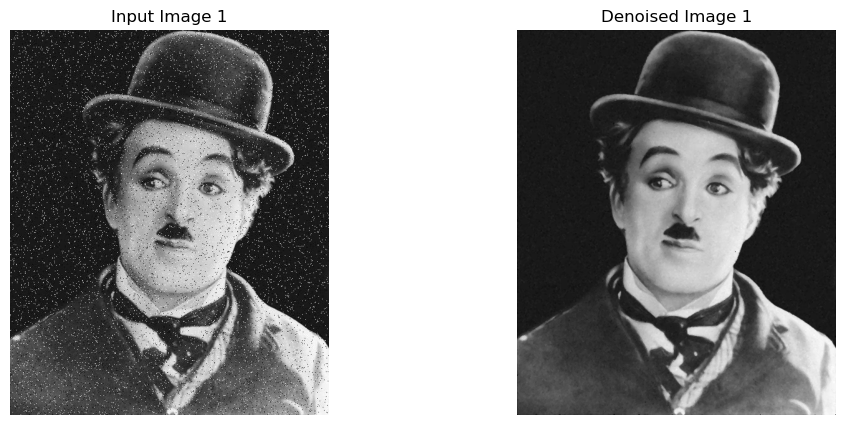

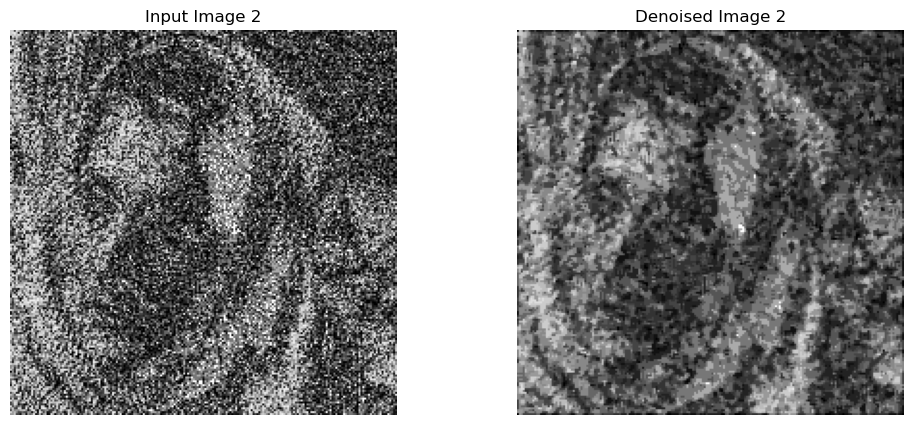

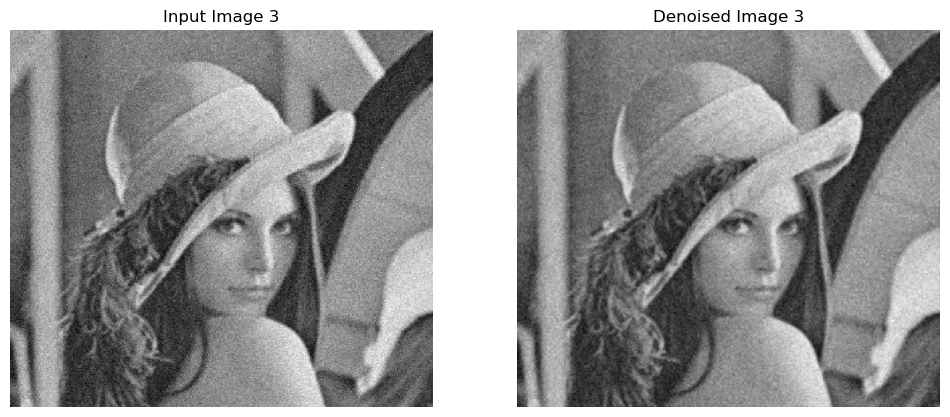

Process 0 took 6.0999998822808266e-05 seconds


In [66]:
if rank == 0:
    # Combine denoised chunks into a single list of denoised images
    denoised_images = [image for sublist in all_denoised_chunks for image in sublist]

    # Plot the input and denoised images for each image
    for i, (input_image, denoised_image) in enumerate(zip(images, denoised_images)):
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        axes[0].imshow(input_image, cmap='gray')
        axes[0].set_title(f'Input Image {i+1}')
        axes[0].axis('off')
        axes[1].imshow(denoised_image, cmap='gray')
        axes[1].set_title(f'Denoised Image {i+1}')
        axes[1].axis('off')
        plt.show()
        
start_time = MPI.Wtime()
end_time = MPI.Wtime()

print("Process", rank, "took", end_time - start_time, "seconds")

In [67]:
!mpiexec -n 4 python hpc_4_img.py

Process 1 took 9.00006853044033e-07 seconds
Process 2 took 1.200009137392044e-06 seconds
Process 3 took 1.300009898841381e-06 seconds
Figure(1200x500)
Figure(1200x500)
Figure(1200x500)
Figure(1200x500)
Process 0 took 8.00006091594696e-07 seconds


In [78]:
image_path = ["D:/data set/sports imags/train/noisy_surf/noisy_001.jpg",
                "D:/data set/sports imags/train/noisy_surf/noisy_002.jpg",
                "D:/data set/sports imags/train/noisy_surf/noisy_003.jpg",
                "D:/data set/sports imags/train/noisy_surf/noisy_004.jpg",
                "D:/data set/sports imags/train/noisy_surf/noisy_005.jpg",
                "D:/data set/sports imags/train/noisy_surf/noisy_006.jpg",
                "D:/data set/sports imags/train/noisy_surf/noisy_007.jpg",
                "D:/data set/sports imags/train/noisy_surf/noisy_008.jpg"]

In [79]:
images = [np.array(Image.open(path)) for path in image_path]

In [80]:
image_chunks = list(chunks(images, len(images) // size))

local_chunks = comm.scatter(image_chunks, root=0)

denoised_chunks = [denoise_image(chunk) for chunk in local_chunks]

all_denoised_chunks = comm.gather(denoised_chunks, root=0)

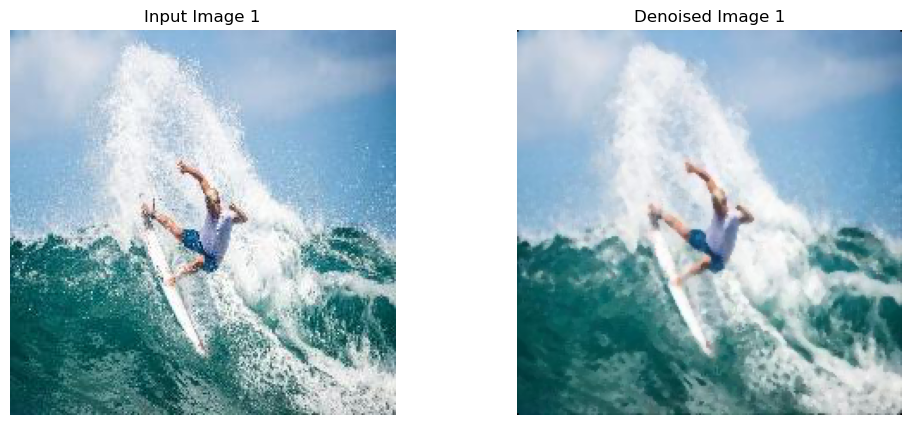

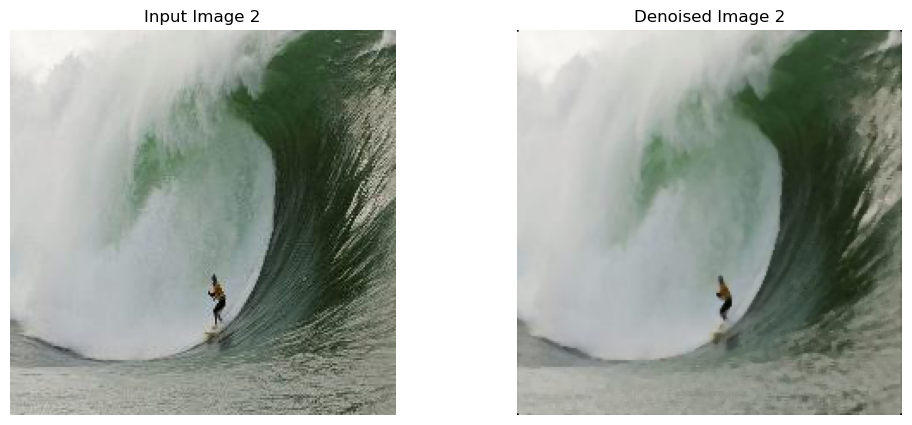

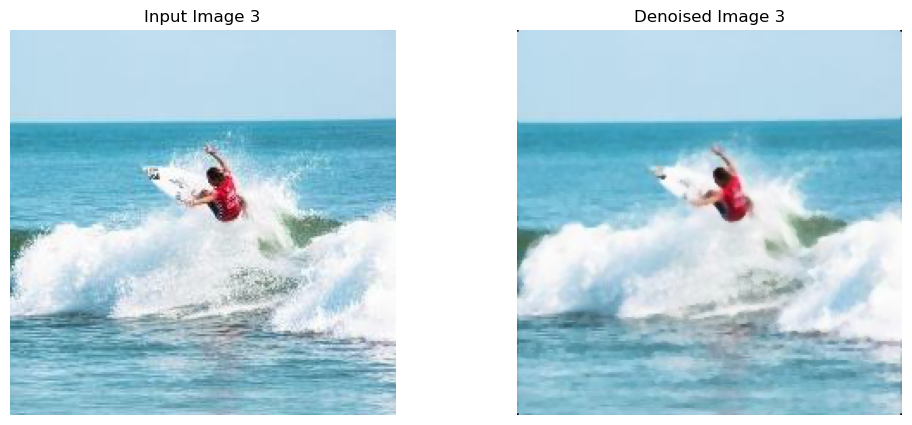

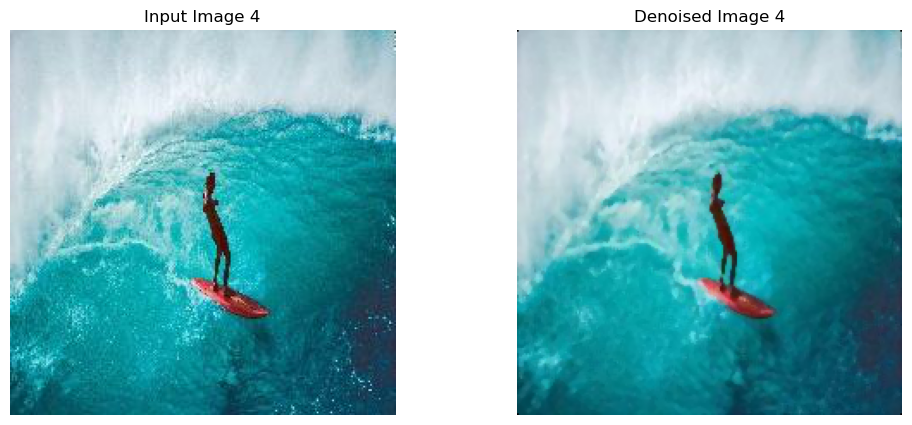

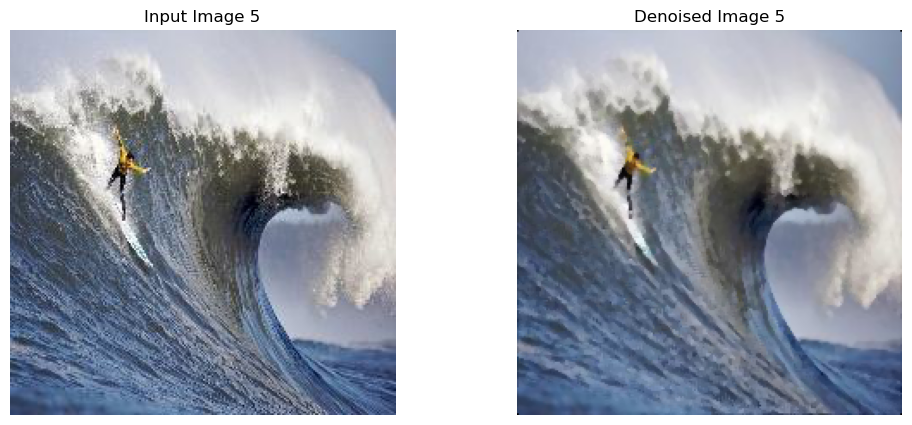

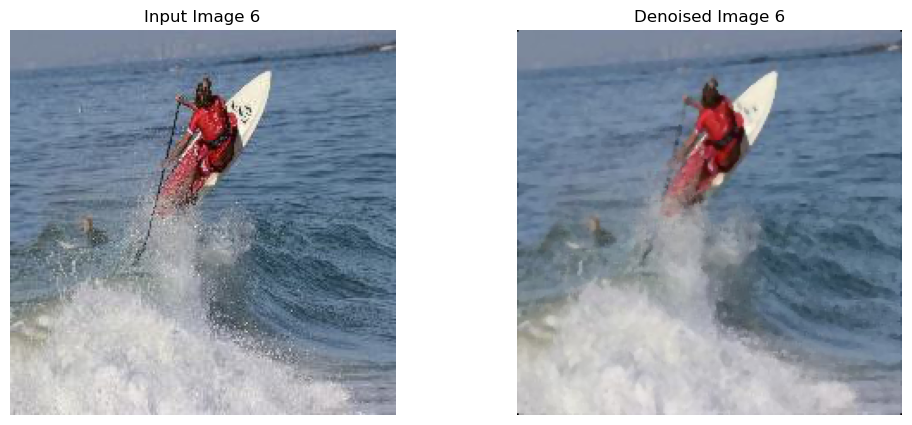

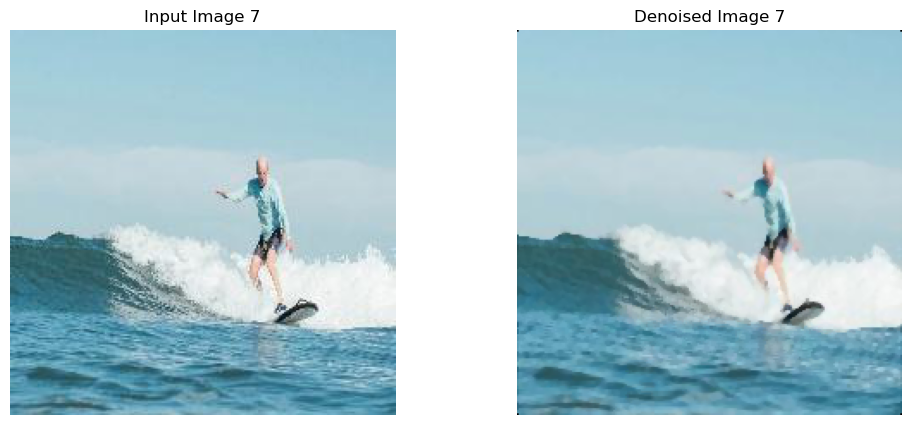

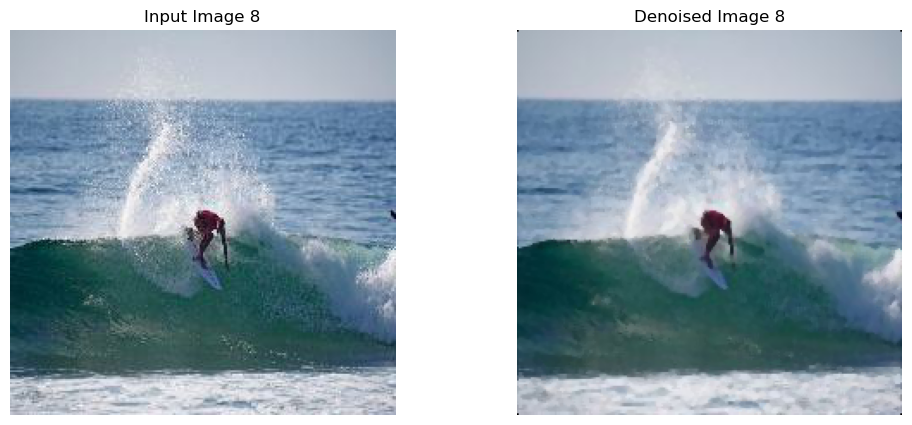

Process 0 took 6.360001862049103e-05 seconds


In [81]:
if rank == 0:
    denoised_images = [image for sublist in all_denoised_chunks for image in sublist]

    for i, (input_image, denoised_image) in enumerate(zip(images, denoised_images)):
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        axes[0].imshow(input_image, cmap='gray')
        axes[0].set_title(f'Input Image {i+1}')
        axes[0].axis('off')
        axes[1].imshow(denoised_image, cmap='gray')
        axes[1].set_title(f'Denoised Image {i+1}')
        axes[1].axis('off')
        plt.show()
        
start_time = MPI.Wtime()
end_time = MPI.Wtime()

print("Process", rank, "took", end_time - start_time, "seconds")

In [83]:
!mpiexec -n 4 python hpc_8_img.py

Process 1 took 7.00005330145359e-07 seconds
Process 2 took 8.00006091594696e-07 seconds
Process 3 took 9.00006853044033e-07 seconds
Figure(1200x500)
Figure(1200x500)
Figure(1200x500)
Figure(1200x500)
Figure(1200x500)
Figure(1200x500)
Figure(1200x500)
Figure(1200x500)
Process 0 took 9.00006853044033e-07 seconds


#### <b>c) Analyze time taken by serial and openMPI processes.</b>

#### <b>d) Try for 100 or more number of images.</b>

In [95]:
import os
import cv2

In [100]:
def add_noise(image):
    noisy_image = image + np.random.normal(loc=0, scale=10, size=image.shape)
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def denoise(image):
    denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
    return denoised_image

def denoise_images(images, output_folder, rank=None):
    start_time = time.time()
    noisy_output_folder = os.path.join(output_folder, "noisy")
    denoised_output_folder = os.path.join(output_folder, "denoised")
    os.makedirs(noisy_output_folder, exist_ok=True)
    os.makedirs(denoised_output_folder, exist_ok=True)
    for i, image in enumerate(images):
        if image is None:
            print(f"Warning: Image {i} could not be loaded. Skipping.")
            continue
        noisy_image = add_noise(image)
        denoised_image = denoise(noisy_image)
        if rank is None or rank == 0:
            cv2.imwrite(os.path.join(noisy_output_folder, f"noisy_image_{i}.jpg"), noisy_image)
            cv2.imwrite(os.path.join(denoised_output_folder, f"denoised_image_{i}.jpg"), denoised_image)
    end_time = time.time()
    return end_time - start_time

def main():
    comm = MPI.COMM_WORLD
    rank = comm.Get_rank()
    size = comm.Get_size()

    folder_path = folder_path = "D:/data set/sports imags/train/surfing"
    output_folder = os.path.join(folder_path, "output1")
    image_files = os.listdir(folder_path)
    images = [cv2.imread(os.path.join(folder_path, file)) for file in image_files]

    if rank == 0:
        print(f"Number of images: {len(images)}")

    # Serial denoising
    if rank == 0:
        print("Serial Denoising:")
    comm.Barrier()  
    serial_time = denoise_images(images, output_folder, rank)
    if rank == 0:
        print(f"Time taken for serial denoising: {serial_time:.2f} seconds")

    # Parallel denoising
    if rank == 0:
        print("Parallel Denoising:")
    comm.Barrier()  
    num_images_per_process = len(images) // size
    start_index = rank * num_images_per_process
    end_index = start_index + num_images_per_process
    parallel_time = denoise_images(images[start_index:end_index], output_folder, rank)
    max_parallel_time = comm.reduce(parallel_time, op=MPI.MAX, root=0)
    if rank == 0:
        print(f"Time taken for parallel denoising: {max_parallel_time:.2f} seconds")

if __name__ == "__main__":
    main()

Number of images: 143
Serial Denoising:
Time taken for serial denoising: 82.58 seconds
Parallel Denoising:
Time taken for parallel denoising: 83.79 seconds


In [102]:
!mpiexec -n 4 python hpc_100_img.py

Number of images: 143
Serial Denoising:
Time taken for serial denoising: 76.59 seconds
Parallel Denoising:
Time taken for parallel denoising: 21.34 seconds


[ WARN:0@0.103] global loadsave.cpp:248 cv::findDecoder imread_('D:/data set/sports imags/train/surfing\output1'): can't open/read file: check file path/integrity
[ WARN:0@0.114] global loadsave.cpp:248 cv::findDecoder imread_('D:/data set/sports imags/train/surfing\output1'): can't open/read file: check file path/integrity
[ WARN:0@0.092] global loadsave.cpp:248 cv::findDecoder imread_('D:/data set/sports imags/train/surfing\output1'): can't open/read file: check file path/integrity
[ WARN:0@0.127] global loadsave.cpp:248 cv::findDecoder imread_('D:/data set/sports imags/train/surfing\output1'): can't open/read file: check file path/integrity


In [103]:
!mpiexec -n 8 python hpc_100_img.py

[ WARN:0@0.093] global loadsave.cpp:248 cv::findDecoder imread_('D:/data set/sports imags/train/surfing\output1'): can't open/read file: check file path/integrity
[ WARN:0@0.120] global loadsave.cpp:248 cv::findDecoder imread_('D:/data set/sports imags/train/surfing\output1'): can't open/read file: check file path/integrity
[ WARN:0@0.121] global loadsave.cpp:248 cv::findDecoder imread_('D:/data set/sports imags/train/surfing\output1'): can't open/read file: check file path/integrity
[ WARN:0@0.148] global loadsave.cpp:248 cv::findDecoder imread_('D:/data set/sports imags/train/surfing\output1'): can't open/read file: check file path/integrity
[ WARN:0@0.136] global loadsave.cpp:248 cv::findDecoder imread_('D:/data set/sports imags/train/surfing\output1'): can't open/read file: check file path/integrity
[ WARN:0@0.168] global loadsave.cpp:248 cv::findDecoder imread_('D:/data set/sports imags/train/surfing\output1'): can't open/read file: check file path/integrity
[ WARN:0@0.188] global


Number of images: 143
Serial Denoising:
Time taken for serial denoising: 160.82 seconds
Parallel Denoising:
Time taken for parallel denoising: 20.70 seconds
